In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import gensim

%matplotlib inline

In [2]:
DATA_DIR = "../owentemple-ted-talks-complete-list"

In [3]:
with open(DATA_DIR + '/datapackage.json', 'r') as f:
    metadata = json.load(f)

In [4]:
metadata.keys()

dict_keys(['name', 'title', 'description', 'homepage', 'resources', 'keywords'])

In [5]:
pprint.pprint(metadata)

{'description': 'Complete listing of all official TED Talks posted (through '
                'June 13, 2017)\n'
                '\n'
                'A complete listing of all TED Talks from official events '
                'posted on TED.com\n'
                '\n'
                'Columns include unique ID, URL where video can be viewed, '
                'full English transcript URL, speaker name, headline, '
                'description, month and year filmed, event, duration, date '
                'published, and topic tags.\n'
                '\n'
                'An expanded version of the dataset includes 111 additional '
                'columns with full English transcript, number of times the '
                'video has been viewed as of 2017-06-16, and variables created '
                'by [Linguistic Inquiry and Word Count](http://www.liwc.net) '
                '(LIWC) software. The LIWC software analyzed the English '
                'transcript and produced variab

In [6]:
ted_talks = pd.read_csv(DATA_DIR + '/data/ted_talks_by_id.csv')

In [7]:
ted_talks.head()

,id,speaker,headline,url,description,transcript_url,month_filmed,year_filmed,event,duration,date_published,tags
0,1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,00:16:17,2006-06-27,"cars,alternative energy,culture,politics,scien..."
1,2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,00:15:06,2006-08-15,"MacArthur grant,simplicity,industrial design,a..."
2,3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,00:18:45,2006-10-18,"corruption,poverty,economics,investment,milita..."
3,4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,00:19:37,2006-10-25,"aircraft,flight,industrial design,NASA,rocket ..."
4,5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,00:20:04,2007-04-05,"cars,industrial design,transportation,inventio..."


In [8]:
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 12 columns):
id                2475 non-null int64
speaker           2475 non-null object
headline          2475 non-null object
url               2475 non-null object
description       2475 non-null object
transcript_url    2475 non-null object
month_filmed      2475 non-null int64
year_filmed       2475 non-null int64
event             2475 non-null object
duration          2475 non-null object
date_published    2475 non-null object
tags              2475 non-null object
dtypes: int64(3), object(9)
memory usage: 232.1+ KB


In [9]:
len(ted_talks['id'].unique())

2475

## First parse of data info

1. id is unique and can be used as index
2. we want to get the full transcript instead of just the url
3. month and year can be converted to datetime format (possibly future index)
4. similarly date_published can be datetime format
5. tags can be a list of strings rather than a whole string

In [10]:
ted_talks = pd.read_csv(DATA_DIR + '/data/ted_talks_by_id.csv', index_col="id", parse_dates=['date_published'])
ted_talks.head()

,speaker,headline,url,description,transcript_url,month_filmed,year_filmed,event,duration,date_published,tags
id,,,,,,,,,,,
1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,00:16:17,2006-06-27,"cars,alternative energy,culture,politics,scien..."
2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,00:15:06,2006-08-15,"MacArthur grant,simplicity,industrial design,a..."
3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,00:18:45,2006-10-18,"corruption,poverty,economics,investment,milita..."
4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,00:19:37,2006-10-25,"aircraft,flight,industrial design,NASA,rocket ..."
5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,00:20:04,2007-04-05,"cars,industrial design,transportation,inventio..."


In [11]:
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2804
Data columns (total 11 columns):
speaker           2475 non-null object
headline          2475 non-null object
url               2475 non-null object
description       2475 non-null object
transcript_url    2475 non-null object
month_filmed      2475 non-null int64
year_filmed       2475 non-null int64
event             2475 non-null object
duration          2475 non-null object
date_published    2475 non-null datetime64[ns]
tags              2475 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 232.0+ KB


In [12]:
# Process date filmed
ted_talks['date_filmed'] = pd.to_datetime((ted_talks['year_filmed'] * 10000  + ted_talks['month_filmed'] * 100 + 1).astype(str), format='%Y%m%d')
ted_talks = ted_talks.drop(['month_filmed', 'year_filmed'], axis=1)
ted_talks.head()

,speaker,headline,url,description,transcript_url,event,duration,date_published,tags,date_filmed
id,,,,,,,,,,
1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,TED2006,00:16:17,2006-06-27,"cars,alternative energy,culture,politics,scien...",2006-02-01
2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,TED2006,00:15:06,2006-08-15,"MacArthur grant,simplicity,industrial design,a...",2006-02-01
3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,TEDGlobal 2005,00:18:45,2006-10-18,"corruption,poverty,economics,investment,milita...",2005-07-01
4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,TED2006,00:19:37,2006-10-25,"aircraft,flight,industrial design,NASA,rocket ...",2006-02-01
5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,TED2002,00:20:04,2007-04-05,"cars,industrial design,transportation,inventio...",2002-02-01


In [13]:
# Process tags
joined_tags = ted_talks['tags'].str.cat(sep=',').split(',')

In [14]:
all_tags = pd.Series(joined_tags).str.strip().str.lower()
tag_counts = all_tags.value_counts()
tag_counts.head()

technology       710
science          541
global issues    495
culture          484
tedx             432
dtype: int64

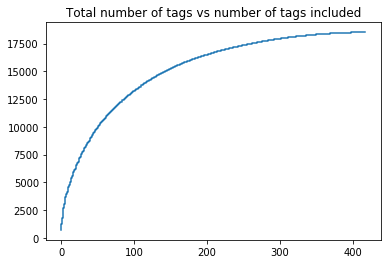

In [15]:
cumulative_tag_counts = np.cumsum(tag_counts)
cumulative_tag_counts.index = range(len(cumulative_tag_counts))
cumulative_tag_counts.plot(drawstyle='steps', title='Total number of tags vs number of tags included');

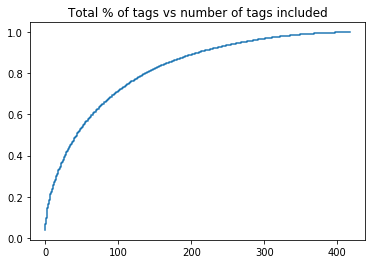

In [16]:
tag_ratios = cumulative_tag_counts / sum(tag_counts)
tag_ratios.plot(drawstyle='steps', title="Total % of tags vs number of tags included");

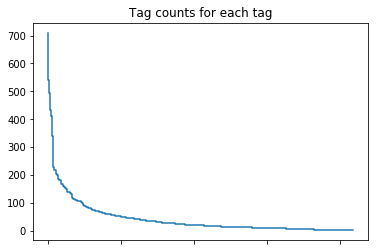

In [17]:
tag_counts.plot(drawstyle='steps', title="Tag counts for each tag");

### Seems like there are some rarely used tags that can be pruned when training our model, possibly set a threshold like 70% for number of tags to inclde

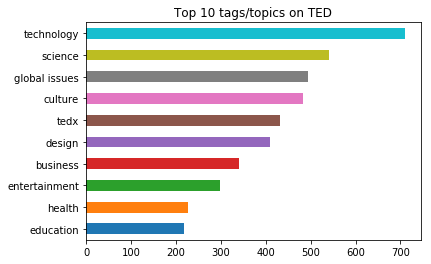

In [18]:
n_topics = 10

tag_counts[:n_topics][::-1].plot(kind='barh',
                                 title=f'Top {n_topics} tags/topics on TED');

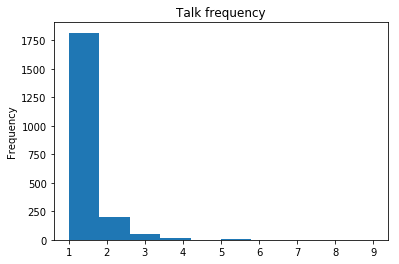

In [19]:
# Most speakers speak just once on ted
ted_talks['speaker'].value_counts().plot(kind='hist', title='Talk frequency');

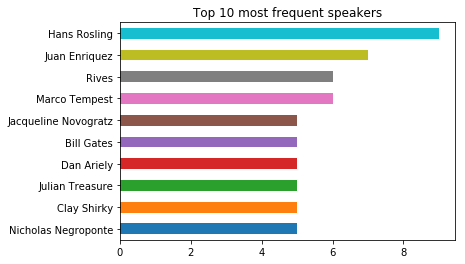

In [20]:
# TODO: convert to interactive w bokeh
n_speakers = 10

ted_talks['speaker']\
    .value_counts()[:n_speakers][::-1]\
    .plot(kind='barh',
          title=f'Top {n_speakers} most frequent speakers');

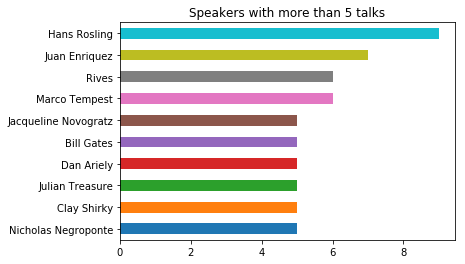

In [21]:
# TODO: convert to interactive w bokeh
n_talks = 5

ted_talks['speaker']\
    .value_counts()[ted_talks['speaker'].value_counts() >= n_talks][::-1]\
    .plot(kind='barh',
          title=f"Speakers with more than {n_talks} talks");